A jewelry company company wants to put in a bid to purchase a large set of diamond, but is unsure how much it should bid. In this project, I would use a predictive model to make a recommendation on how much the jewellry company should bid for the diamonds


## Understanding the data
We would make use of the diamonds.csv dataset to train the model(this contains the price and has 50,000entries)  and the new-diamonds.csv dataset to test the model(this contains the 3000 diamond set we are trying to predict the price of and does not contain the price). Ultimately, we want to recommend the bid price for the entire batch, which will be 70% of the sum of the predicted price.Both datasets contain carat, cut, and clarity data for each diamond. Only the diamonds.csv dataset has prices.

Carat represents the weight of the diamond, and is a numerical variable.
Cut represents the quality of the cut of the diamond, and falls into 5 categories: fair, good, very good, ideal, and premium. 
Clarity represents the internal purity of the diamond, and falls into 8 categories: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, and IF (in order from least to most pure). In project zero, these categories were represented by an ordinal variable, 1-8. You can decide to use the ordinal or categorical variable.
Color represents the color of the diamond, and is rated D through J, with D being the most colorless (and valuable) and J being the most yellow.

In [103]:
import pandas as pd

diamonds_data = pd.read_csv("C://Users//Prisca//Documents//Diamonds_regression//diamonds - Sheet1.csv")
diamonds_data.head()


,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [104]:
new_diamond_data =pd.read_csv("C://Users//Prisca//Documents//Diamonds_regression//new-diamonds - Sheet1.csv") 
new_diamond_data.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


In [105]:
diamonds_data.dtypes

Unnamed: 0       int64
carat          float64
cut             object
cut_ord          int64
color           object
clarity         object
clarity_ord      int64
price            int64
dtype: object

In [106]:
diamonds_data['cut'].unique()

array(['Premium', 'Fair', 'Very Good', 'Good', 'Ideal'], dtype=object)

In [107]:
diamonds_data['clarity'].unique()

array(['VS1', 'I1', 'VS2', 'VVS1', 'SI1', 'VVS2', 'SI2', 'IF'],
      dtype=object)

In [108]:
diamonds_data['color'].unique()

array(['F', 'G', 'E', 'D', 'H', 'J', 'I'], dtype=object)

In [109]:
diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   carat        50000 non-null  float64
 2   cut          50000 non-null  object 
 3   cut_ord      50000 non-null  int64  
 4   color        50000 non-null  object 
 5   clarity      50000 non-null  object 
 6   clarity_ord  50000 non-null  int64  
 7   price        50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


Since we do not have any empty or null values, we can go ahead to understand the relationship between the columns in the dataset.

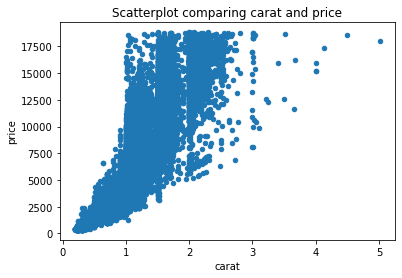

In [110]:
import numpy as np
import matplotlib.pyplot as plt
diamonds_data.plot.scatter( x = "carat" , y = "price", title = 'Scatterplot comparing carat and price')
plt.show()

It can be seen that the price increases as the carat weight increases

In [111]:
"""df['Gender'].value_counts().plot(kind = 'bar')
        plt.xlabel("Gender")
        plt.ylabel('Frequency distribution')
        plt.show()"""
table = diamonds_data.groupby(['cut']).agg({'price':'sum'})
table

,price
cut,
Fair,6565198
Good,17965388
Ideal,69121606
Premium,58888497
Very Good,44414486


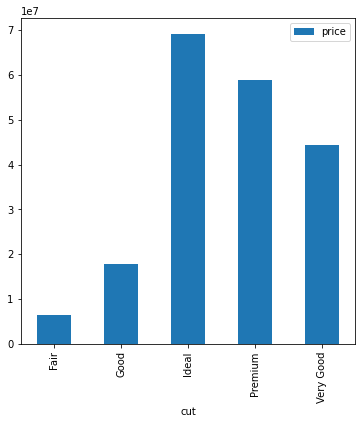

In [112]:
table.plot(kind = 'bar', figsize = (6,6))
plt.show()

It can be seen that the ideal cut seems to be sold the most.

In [113]:
table = diamonds_data.groupby(['clarity']).agg({'price':'sum'})
table

,price
clarity,
I1,2698849
IF,4817533
SI1,48536336
SI2,42994258
VS1,29311840
VS2,44720705
VVS1,8528384
VVS2,15347270


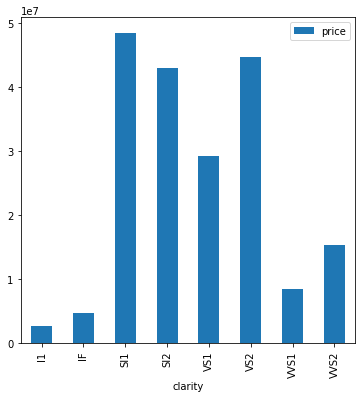

In [114]:
table.plot(kind = 'bar', figsize = (6,6))
plt.show()

Using the order I1, SI2, SI1, VS2, VS1, VVS2, VVS1, from least to most pure,it can be seen that the third least pure diamond seems to be sold the most.

In [115]:
table = diamonds_data.groupby(['clarity']).agg({'clarity':'count'}).rename(columns = {'clarity':'clarity','clarity':'Number_sold'})
table

,Number_sold
clarity,
I1,686
IF,1661
SI1,12097
SI2,8523
VS1,7599
VS2,11355
VVS1,3379
VVS2,4700


Comparing with the number of each clarity category sold as well yielded the same result as the price sold.

In [116]:
table = diamonds_data.groupby(['color']).agg({'price':'sum'})
table

,price
color,
D,19726251
E,27959935
F,32971231
G,41821565
H,34658966
I,25959621
J,13857606


In [117]:
table = diamonds_data.groupby(['color']).agg({'color':'count'}).rename(columns = {'color':'color','color':'Number_sold'})
table

,Number_sold
color,
D,6268
E,9056
F,8843
G,10448
H,7704
I,5076
J,2605


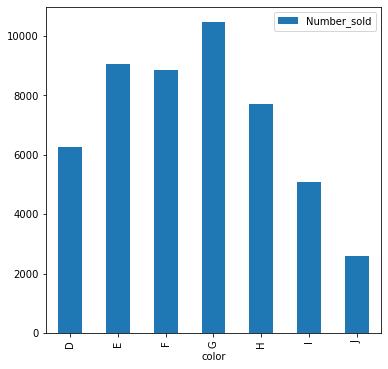

In [118]:
table.plot(kind = 'bar', figsize = (6,6))
plt.show()

From the colour ordered D through J, with D being the most colorless (and valuable) and J being the most yellow. It can be seen that G is the most sold.

In [119]:
diamonds_data.corr()

,Unnamed: 0,carat,cut_ord,clarity_ord,price
Unnamed: 0,1.000000,-0.002164,0.001330,0.000927,-0.001947
carat,-0.002164,1.000000,-0.135679,-0.343725,0.921777
cut_ord,0.001330,-0.135679,1.000000,0.189461,-0.053804
clarity_ord,0.000927,-0.343725,0.189461,1.000000,-0.142159
price,-0.001947,0.921777,-0.053804,-0.142159,1.000000


Considering the two objectives when building a model
* To  understand the relationship between the dependent and independent variable(correlation).
* To predict the depemdent variable.

We can see that the correlation between the continous variables (price and carat is okay as it is above  0.5 and -0.5)
Bearing that in mind, we can go ahead to build the model.


## Building the model
It is best to interpret regression results when dummy variables are limited to two specific values.

In [120]:
X = diamonds_data[['carat','cut','clarity','color']]

In [121]:
X = pd.get_dummies(data = X, drop_first = True)
X.head()

,carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.51,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,2.25,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.70,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.47,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0.30,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [122]:
Y = diamonds_data['price']
Y.head()

0    1749
1    7069
2    2757
3    1243
4     789
Name: price, dtype: int64

Next, we create the train and test model using sklearn 

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40000, 18)
(10000, 18)
(40000,)
(10000,)


Next, we import regression model


In [124]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [125]:
regr.fit(X_train, Y_train)


LinearRegression()

In [126]:
print(regr.intercept_)

-7466.063996057408


In [127]:
coeff_parameter = pd.DataFrame(regr.coef_,X.columns,columns= ['Coefficient'])
coeff_parameter

,Coefficient
carat,8892.973734
cut_Good,714.938146
cut_Ideal,1044.298941
cut_Premium,910.851641
cut_Very Good,891.437379
clarity_IF,5453.725353
clarity_SI1,3619.686735
clarity_SI2,2669.062951
clarity_VS1,4591.320415
clarity_VS2,4270.046449


In [128]:
predictions = regr.predict(X_test)
predictions

array([6508.52925175, 4162.29274554, 1856.23619158, ..., -394.85879534,
       -122.31541264, 6333.71673373])

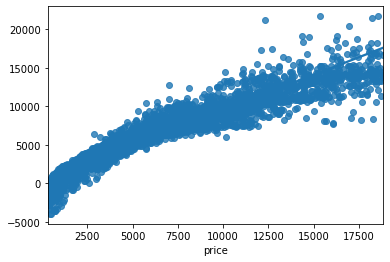

In [129]:
import seaborn as sns
sns.regplot(Y_test,predictions)

In [130]:
import statsmodels.api as sm
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(Y_train, X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.432e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:37:27   Log-Likelihood:            -3.3902e+05
No. Observations:               40000   AIC:                         6.781e+05
Df Residuals:                   39981   BIC:                         6.782e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7466.0640     60.474   -123.458

In building the model, since we predicted the independent variable, the value of the r-squared is vital in testing the validity of the model,\
we can see that it is above 0.9 which is very acceptable as R-squared is the measure of the error. A lower r-squared indicates a model with more errors, which in turn produces predictions that are less precise. However, since we are performing a multiple linear regression,\
we would focus more on the adjusted r-squared as sometimes the the r-squared value increases as variables increases.

Also considering the p-value, a low p-value (i.e < 0.5) indicates statistical significance), as it tests the null-hypothesis and in this case all independent variables are statistically significant. 

In [131]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, predictions))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, predictions))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 799.1932851977673
Mean Squared Error: 1300636.7303636111
Root Mean Squared Error: 1140.4546156527279


In [132]:
new_diamonds = new_diamond_data[['carat','cut','clarity','color']]
new_diamonds= pd.get_dummies(data = ind, drop_first = True)
new_diamonds.head()

,carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,1.22,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1.01,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0.71,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1.01,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.27,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [133]:
price_of_each_diamond = regr.predict(new_diamonds)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 8892.973734     714.93814646  1044.29894105   910.85164135
   891.43737945  5453.72535301  3619.68673461  2669.06295052
  4591.32041508  4270.04644941  5105.85634117  5005.26056901
  -198.10101257  -293.80406056  -496.46813201  -963.53855028
 -1430.76973438 -2323.80015624]


In [134]:
print('intercept: \n', regr.intercept_)

intercept: 
 -7466.063996057408


In [135]:
n = len(price)
n

3000

In [136]:
Total_Amount = sum(price,n)
Total_Amount

11761030.582397472

Since the bid price is 70% of the retail price

In [137]:
Total_Amount = Total_Amount * 0.7
Total_Amount

8232721.40767823

This is the amount to be bid for 3000 diamonds